In [1]:
import zipfile

# download dos arquivos de imagens zipados
!wget https://infoslack.pro/pizza_steak.zip

# descompactando o zip
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-02-27 20:28:20--  https://infoslack.pro/pizza_steak.zip
Resolving infoslack.pro (infoslack.pro)... 35.202.40.163
Connecting to infoslack.pro (infoslack.pro)|35.202.40.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109497985 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.42M  27.4MB/s    in 4.2s    

2022-02-27 20:28:24 (24.8 MB/s) - ‘pizza_steak.zip’ saved [109497985/109497985]



In [2]:
import os
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [3]:
# Visualiza uma imagem
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # diretório de destino
  target_folder = target_dir+target_class

  # Pega um caminho de imagem aleatório
  random_image = random.sample(os.listdir(target_folder), 1)

  # lendo a imagem e plotando com matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # mostra o formato da imagem (tamanho)

  return img

Image shape: (512, 512, 3)


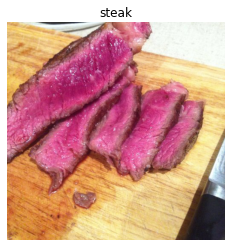

In [4]:
img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")

In [5]:
img.shape

(512, 512, 3)

In [6]:
img

array([[[232, 189, 120],
        [222, 179, 111],
        [225, 182, 114],
        ...,
        [241, 244, 237],
        [242, 245, 238],
        [241, 244, 237]],

       [[221, 178, 110],
        [216, 173, 105],
        [222, 178, 113],
        ...,
        [239, 242, 235],
        [241, 244, 237],
        [241, 244, 237]],

       [[218, 173, 108],
        [217, 172, 107],
        [226, 180, 118],
        ...,
        [239, 242, 235],
        [240, 243, 236],
        [238, 241, 234]],

       ...,

       [[238, 188, 125],
        [227, 176, 113],
        [216, 165, 102],
        ...,
        [ 58,  56,  57],
        [ 58,  56,  57],
        [ 57,  55,  56]],

       [[240, 192, 120],
        [234, 186, 114],
        [221, 172, 103],
        ...,
        [ 60,  58,  59],
        [ 62,  60,  61],
        [ 62,  60,  61]],

       [[235, 188, 106],
        [235, 188, 108],
        [224, 176, 100],
        ...,
        [ 58,  56,  57],
        [ 60,  59,  57],
        [ 61,  60,  58]]

In [7]:
img/255.

array([[[0.90980392, 0.74117647, 0.47058824],
        [0.87058824, 0.70196078, 0.43529412],
        [0.88235294, 0.71372549, 0.44705882],
        ...,
        [0.94509804, 0.95686275, 0.92941176],
        [0.94901961, 0.96078431, 0.93333333],
        [0.94509804, 0.95686275, 0.92941176]],

       [[0.86666667, 0.69803922, 0.43137255],
        [0.84705882, 0.67843137, 0.41176471],
        [0.87058824, 0.69803922, 0.44313725],
        ...,
        [0.9372549 , 0.94901961, 0.92156863],
        [0.94509804, 0.95686275, 0.92941176],
        [0.94509804, 0.95686275, 0.92941176]],

       [[0.85490196, 0.67843137, 0.42352941],
        [0.85098039, 0.6745098 , 0.41960784],
        [0.88627451, 0.70588235, 0.4627451 ],
        ...,
        [0.9372549 , 0.94901961, 0.92156863],
        [0.94117647, 0.95294118, 0.9254902 ],
        [0.93333333, 0.94509804, 0.91764706]],

       ...,

       [[0.93333333, 0.7372549 , 0.49019608],
        [0.89019608, 0.69019608, 0.44313725],
        [0.84705882, 0

## Componentes de uma CNN

| Hiperparâmetro | O que faz?                                                  | Valores                                                                       |
| :------------------------ | :---------------------------------------------------------------- | :----------------------------------------------------------------------------------- |
| Input image(s)            | Segmenta imagens nas quais queremos descobrir padrões                  | Qualquer imagem ou vídeo                                          |
| Input layer               | Pré-processa imagens para camadas adicionais   | `input_shape = [batch_size, image_height, image_width, color_channels]`                |
| Convolution layer         | Aprende os padrões mais importantes das imagens (características)    | Pode criar com `tf.keras.layers.ConvXD` (onde `X` pode ser vários valores)          |
| Hidden activation         | Adiciona não linearidade aos recursos aprendidos       | Normalmente `ReLU` (`tf.keras.activations.relu`)                                             |
| Pooling layer             | Reduz a dimensionalidade dos recursos de imagem aprendidos              | Média (`tf.keras.layers.AvgPool2D`) ou Máximo (`tf.keras.layers.MaxPool2D`)               |
| Fully connected layer     | Refina ainda mais os recursos aprendidos das camadas de convolucionais          | `tf.keras.layers.Dense`                                                                |
| Output layer              | Pega os recursos aprendidos e os produz na forma correta para o destino | `output_shape = [number_of_classes]` (ex: 3 para pizza, carne ou sushi)                |
| Output activation         | Adiciona não linearidades à camada de saída                              | `tf.keras.activations.sigmoid` (binary classification) ou `tf.keras.activations.softmax` |

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configurando o seed
tf.random.set_seed(13)

# Dados de pré-processamento (queremos os valores de pixel entre 0 e 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Configurando diretórios de treino e teste
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Importando os dados dos diretórios e transformando em lotes
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Criando um modelo CNN
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3,
                         activation="relu",
                         # Primeira camada, especificando a forma de entrada
                         # altura, largura e rgb
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # output activation
])

# Compila o modelo
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Treina o modelo
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 259ms/step - loss: 0.6406 - accuracy: 0.6260 - val_loss: 0.4600 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 11s 232ms/step - loss: 0.4830 - accuracy: 0.7847 - val_loss: 0.4157 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 11s 228ms/step - loss: 0.4383 - accuracy: 0.8020 - val_loss: 0.4157 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 11s 243ms/step - loss: 0.4018 - accuracy: 0.8193 - val_loss: 0.4169 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 11s 230ms/step - loss: 0.3648 - accuracy: 0.8387 - val_loss: 0.3468 - val_accuracy: 0.8600


In [9]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [10]:
# Seed
tf.random.set_seed(42)

# Criando um modelo (réplica do TensorFlow Playground)
model_2 = tf.keras.Sequential([
  # dense layers esperam um vetor unidimensional como entrada
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compila
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_2 = model_2.fit(train_data, # utilizando os nossos dados agora
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 208ms/step - loss: 0.9842 - accuracy: 0.4967 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 202ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 201ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 202ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 201ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [11]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Seed
tf.random.set_seed(42)

# Criando um modelo (réplica do TensorFlow Playground)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  # aumenta o número de neurônios de 4 para 100 em cada camada
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # adiciona camada extra
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compila
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 214ms/step - loss: 4.0212 - accuracy: 0.6293 - val_loss: 1.3855 - val_accuracy: 0.5700
Epoch 2/5
47/47 [==============================] - 9s 202ms/step - loss: 1.0221 - accuracy: 0.6713 - val_loss: 0.5294 - val_accuracy: 0.7740
Epoch 3/5
47/47 [==============================] - 9s 202ms/step - loss: 0.6631 - accuracy: 0.7280 - val_loss: 0.5132 - val_accuracy: 0.7780
Epoch 4/5
47/47 [==============================] - 9s 203ms/step - loss: 0.6069 - accuracy: 0.7660 - val_loss: 0.6064 - val_accuracy: 0.7120
Epoch 5/5
47/47 [==============================] - 9s 202ms/step - loss: 0.5829 - accuracy: 0.7620 - val_loss: 0.6130 - val_accuracy: 0.7120


In [13]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


### 1. import

Image shape: (384, 512, 3)
Image shape: (384, 512, 3)


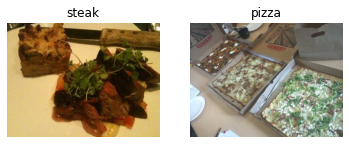

In [14]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza");

### 2. pré-processamento

In [15]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [17]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


### 3. criando o modelo

In [18]:
# imports
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [19]:
model_4 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [20]:
# Compila o modelo
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [21]:
# Fit
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 256ms/step - loss: 1.8590 - accuracy: 0.5980 - val_loss: 0.6118 - val_accuracy: 0.7400
Epoch 2/5
47/47 [==============================] - 11s 236ms/step - loss: 0.5063 - accuracy: 0.7607 - val_loss: 0.4087 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 11s 241ms/step - loss: 0.3512 - accuracy: 0.8540 - val_loss: 0.3932 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 11s 236ms/step - loss: 0.2262 - accuracy: 0.9233 - val_loss: 0.4314 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 11s 236ms/step - loss: 0.1283 - accuracy: 0.9627 - val_loss: 0.5671 - val_accuracy: 0.7780


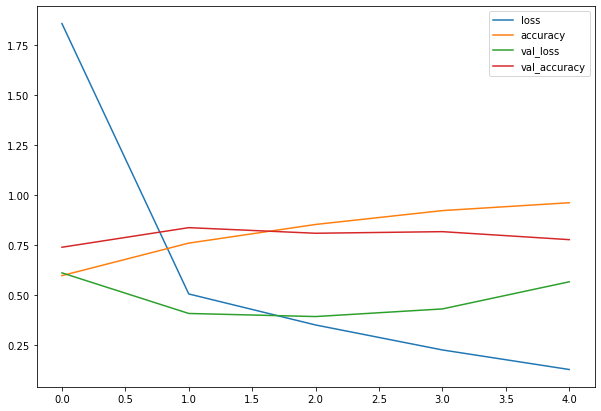

In [22]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [23]:
# Função para plotar os dados de validação e treino separadamente
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

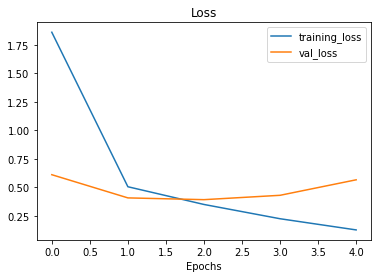

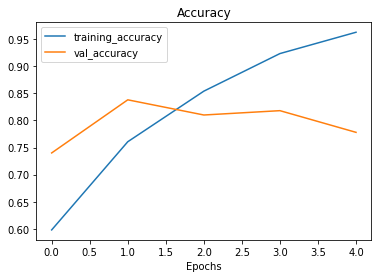

In [24]:
plot_loss_curves(history_4)

In [25]:
# criando o modelo que será usado como linha de base
# gerando uma rede neural convolucional de 3 camadas
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [26]:
# Compila
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
# Fit
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 225ms/step - loss: 0.6787 - accuracy: 0.5580 - val_loss: 0.6229 - val_accuracy: 0.6060
Epoch 2/5
47/47 [==============================] - 10s 220ms/step - loss: 0.4904 - accuracy: 0.7760 - val_loss: 0.3830 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 10s 222ms/step - loss: 0.4189 - accuracy: 0.8160 - val_loss: 0.3689 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 10s 218ms/step - loss: 0.4041 - accuracy: 0.8273 - val_loss: 0.3446 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 10s 219ms/step - loss: 0.3864 - accuracy: 0.8233 - val_loss: 0.3811 - val_accuracy: 0.8380


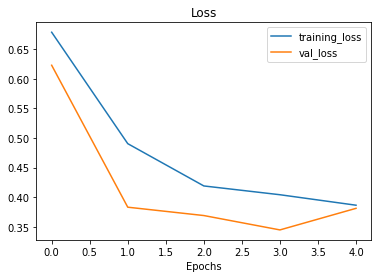

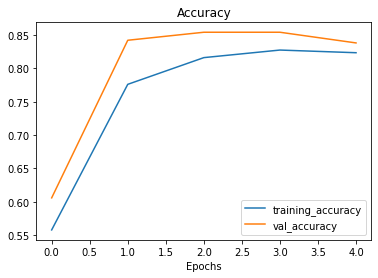

In [27]:
plot_loss_curves(history_5)

In [28]:
# ImageDataGenerator com data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             # rotaciona ligeiramente a 20 graus
                                             rotation_range=20,
                                             # corta a imagem
                                             shear_range=0.2,
                                             # zoom na imagem
                                             zoom_range=0.2,
                                             # altera a largura da imagem
                                             width_shift_range=0.2,
                                             # muda a altura da imagem
                                             height_shift_range=0.2,
                                             # vira a imagem no eixo horizontal
                                             horizontal_flip=True)

# Instância de treino ImageDataGenerator sem data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Instância de teste ImageDataGenerator sem data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [39]:
# Importa os dados e aumenta
print("Imagens de treino aumentadas:")
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False)

# Cria lotes de dados não aumentados
print("Imagens de treino não aumentadas:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

print("Imagens de teste inalteradas:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Imagens de treino aumentadas:
Found 1500 images belonging to 2 classes.
Imagens de treino não aumentadas:
Found 1500 images belonging to 2 classes.
Imagens de teste inalteradas:
Found 500 images belonging to 2 classes.


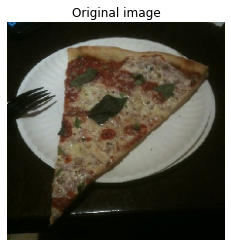

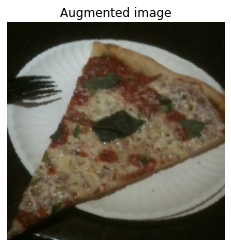

In [40]:
# Pegando lote de dados de exemplo
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

# Plota imagem original e aumentada
random_number = random.randint(0, 32)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [43]:
# Importa os dados e aumenta
print("Imagens de treino aumentadas:")
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True) # ativando o shuffle para ter dados aleatórios

# Criando um modelo (mesmo que model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compila o modelo
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit
# trocando para dados aumentados
history_6 = model_6.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Imagens de treino aumentadas:
Found 1500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 27s 559ms/step - loss: 0.6748 - accuracy: 0.5740 - val_loss: 0.5910 - val_accuracy: 0.7260
Epoch 2/5
47/47 [==============================] - 26s 543ms/step - loss: 0.5652 - accuracy: 0.7127 - val_loss: 0.4812 - val_accuracy: 0.7780
Epoch 3/5
47/47 [==============================] - 27s 570ms/step - loss: 0.5365 - accuracy: 0.7433 - val_loss: 0.4027 - val_accuracy: 0.8060
Epoch 4/5
47/47 [==============================] - 26s 556ms/step - loss: 0.4931 - accuracy: 0.7707 - val_loss: 0.3649 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 26s 545ms/step - loss: 0.4847 - accuracy: 0.7707 - val_loss: 0.3476 - val_accuracy: 0.8440


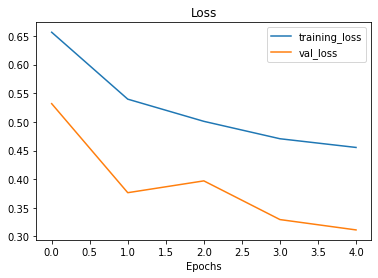

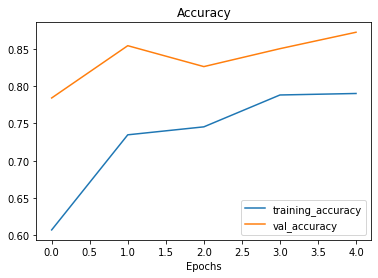

In [42]:
plot_loss_curves(history_6)

In [44]:
# Cria um modelo CNN com arquitetura Tiny VGG para classificação binária
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compila o modelo
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 570ms/step - loss: 0.6072 - accuracy: 0.6733 - val_loss: 0.4992 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 27s 574ms/step - loss: 0.5481 - accuracy: 0.7113 - val_loss: 0.4332 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 28s 594ms/step - loss: 0.5080 - accuracy: 0.7627 - val_loss: 0.3973 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 27s 570ms/step - loss: 0.4983 - accuracy: 0.7700 - val_loss: 0.3728 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 27s 569ms/step - loss: 0.5110 - accuracy: 0.7753 - val_loss: 0.3581 - val_accuracy: 0.8360


In [45]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [46]:
model_7.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_20 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_22 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

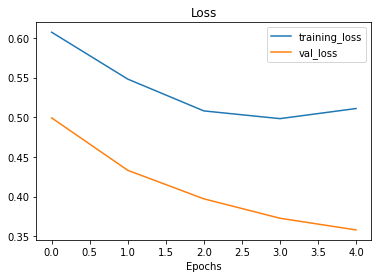

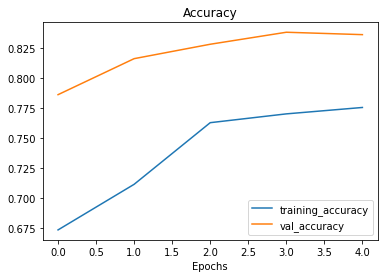

In [47]:
plot_loss_curves(history_7)

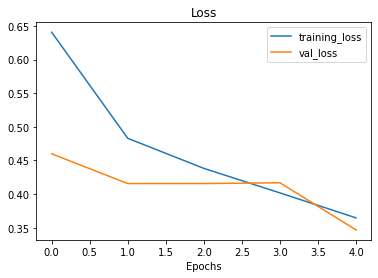

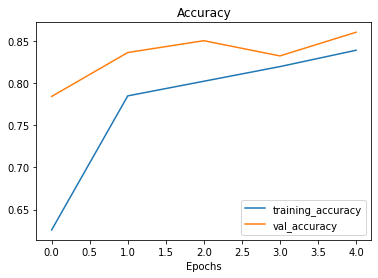

In [48]:
plot_loss_curves(history_1)

--2022-02-27 23:41:03--  https://raw.githubusercontent.com/infoslack/food-vision/main/data/pred/04-pizza.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1063048 (1.0M) [image/png]
Saving to: ‘04-pizza.png’

04-pizza.png        100%[===================>]   1.01M  --.-KB/s    in 0.02s   

2022-02-27 23:41:03 (46.3 MB/s) - ‘04-pizza.png’ saved [1063048/1063048]



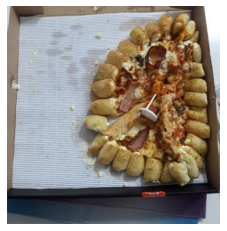

In [53]:
!wget https://raw.githubusercontent.com/infoslack/food-vision/main/data/pred/04-pizza.png
pizza = mpimg.imread("04-pizza.png")
plt.imshow(pizza)
plt.axis(False);

In [54]:
pizza.shape

(1035, 1013, 4)

In [55]:
# Função para importar imagem e redimensioná-la
def load_and_prep_image(filename, img_shape=224):
  # Faz a leitura de uma imagem
  img = tf.io.read_file(filename)

  # Decodifica o arquivo lido em um tensor
  img = tf.image.decode_image(img, channels=3)

  # Redimensiona a imagem (para o tamanho que o modelo foi treinado)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Converte a imagem para escala entre 0 e 1
  img = img/255.
  return img

In [56]:
pizza = load_and_prep_image("04-pizza.png")
pizza

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.76675683, 0.8222251 , 0.8321166 ],
        [0.74965155, 0.80900824, 0.8364592 ],
        [0.7734243 , 0.81416315, 0.8236739 ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.7647059 , 0.8134637 , 0.8272767 ],
        [0.7602504 , 0.8190739 , 0.8465249 ],
        [0.7710259 , 0.81056964, 0.81644785],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.7656425 , 0.81479776, 0.82259274],
        [0.76625985, 0.81724024, 0.8483544 ],
        [0.78615195, 0.8184483 , 0.827451  ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.30793068, 0.32753852, 0.3432248 ],
        [0.33

In [57]:
# Adicionando dimensão extra
print(f"Shape antes da nova dimensão: {pizza.shape}")
pizza = tf.expand_dims(pizza, axis=0)
print(f"Shape depois da nova dimensão: {pizza.shape}")
pizza

Shape antes da nova dimensão: (224, 224, 3)
Shape depois da nova dimensão: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.76675683, 0.8222251 , 0.8321166 ],
         [0.74965155, 0.80900824, 0.8364592 ],
         [0.7734243 , 0.81416315, 0.8236739 ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.7647059 , 0.8134637 , 0.8272767 ],
         [0.7602504 , 0.8190739 , 0.8465249 ],
         [0.7710259 , 0.81056964, 0.81644785],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.7656425 , 0.81479776, 0.82259274],
         [0.76625985, 0.81724024, 0.8483544 ],
         [0.78615195, 0.8184483 , 0.827451  ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[0.30793068, 0.32753852, 

In [58]:
# Fazendo uma previsão em um imagem personalizada
pred = model_7.predict(pizza)
pred

array([[0.35808182]], dtype=float32)

In [69]:
import numpy as np
class_names = np.array(["pizza", "steak"])
class_names

array(['pizza', 'steak'], dtype='<U5')

In [75]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'pizza'

In [76]:
def pred_and_plot(model, filename, class_names):
  # importa a imagem personalizada
  img = load_and_prep_image(filename)

  # realiza uma previsão
  pred = model.predict(tf.expand_dims(img, axis=0))

  # captura a classe prevista
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plota a imagem + nome da classe prevista
  plt.imshow(img)
  plt.title(f"Previsão: {pred_class}")
  plt.axis(False);

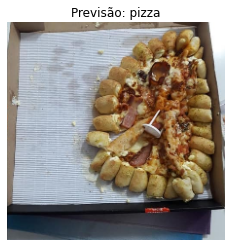

In [77]:
pred_and_plot(model_7, "04-pizza.png", class_names)